# Git

In [ ]:
! git clone https://github.com/WastingT-me/GPN-test.git
%cd /content/GPN-test

# Чтение и анализ данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.DataFrame(pd.read_excel("data/data.xlsx"))
print(df.shape)
df.head()

(407, 38)


,datatime,Y,X1,X2,X3,X4,X5,X6,X7,X8,...,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36
0,01.01.2019 07:00:00,851.3,13992.829540,280.748261,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation,390.014061,34.641964,0.590507,1.334964,...,173.592126,1880.250775,64934.226796,1997.009659,46.058654,34.107018,4.122300,38.266313,369.910731,370.940167
1,02.01.2019 07:00:00,851.7,13214.682745,287.760227,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation,389.976684,29.417244,3.039666,1.261034,...,173.474671,1900.988241,64887.815539,1990.852706,46.216459,34.941665,4.113665,39.091541,369.402941,371.119521
2,02.01.2019 07:00:00,851.7,13214.682745,287.760227,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation,389.976684,29.417244,3.039666,1.261034,...,173.474671,1900.988241,64887.815539,1990.852706,46.216459,34.941665,4.113665,39.091541,369.402941,371.119521
3,03.01.2019 07:00:00,852.4,13031.126273,287.446907,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation,389.960257,23.281082,2.986076,1.269644,...,173.516566,1894.297256,65080.555143,1981.679355,46.388590,34.852216,4.111253,38.996565,369.191242,371.213372
4,04.01.2019 07:00:00,852.8,13599.110247,276.926470,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation,389.995702,22.760785,3.119679,1.255986,...,173.526882,1913.514736,64998.802233,1997.338611,47.227642,35.533084,4.134403,39.680946,368.975814,371.347260


Ищем не-числовые признаки

In [ ]:
non_numerical_cols = df.select_dtypes(include=["object"]).columns.tolist()
df[non_numerical_cols].head()

,datatime,X3,X4
0,01.01.2019 07:00:00,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation
1,02.01.2019 07:00:00,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation
2,02.01.2019 07:00:00,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation
3,03.01.2019 07:00:00,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation
4,04.01.2019 07:00:00,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation


Х3 и Х4 убираем за неимением "хороших данных", "datatime" - не участвует в регрессии

In [ ]:
df = df.drop(columns=['datatime', 'X3', 'X4'])

In [ ]:
df.isna().sum()

Y      60
X1      0
X2      0
X5      0
X6      0
X7      0
X8      0
X9      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X25     0
X26     0
X27     0
X28     0
X29     0
X30     0
X31     0
X32     0
X33     0
X34     0
X35     0
X36     0
dtype: int64

Пойдем по пути наименьшего сопротивления и просто уберем пропуски таргетов

In [ ]:
df = df.dropna()

# Корреляционный анализ

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as st
import seaborn as sns

import statsmodels.api as sm

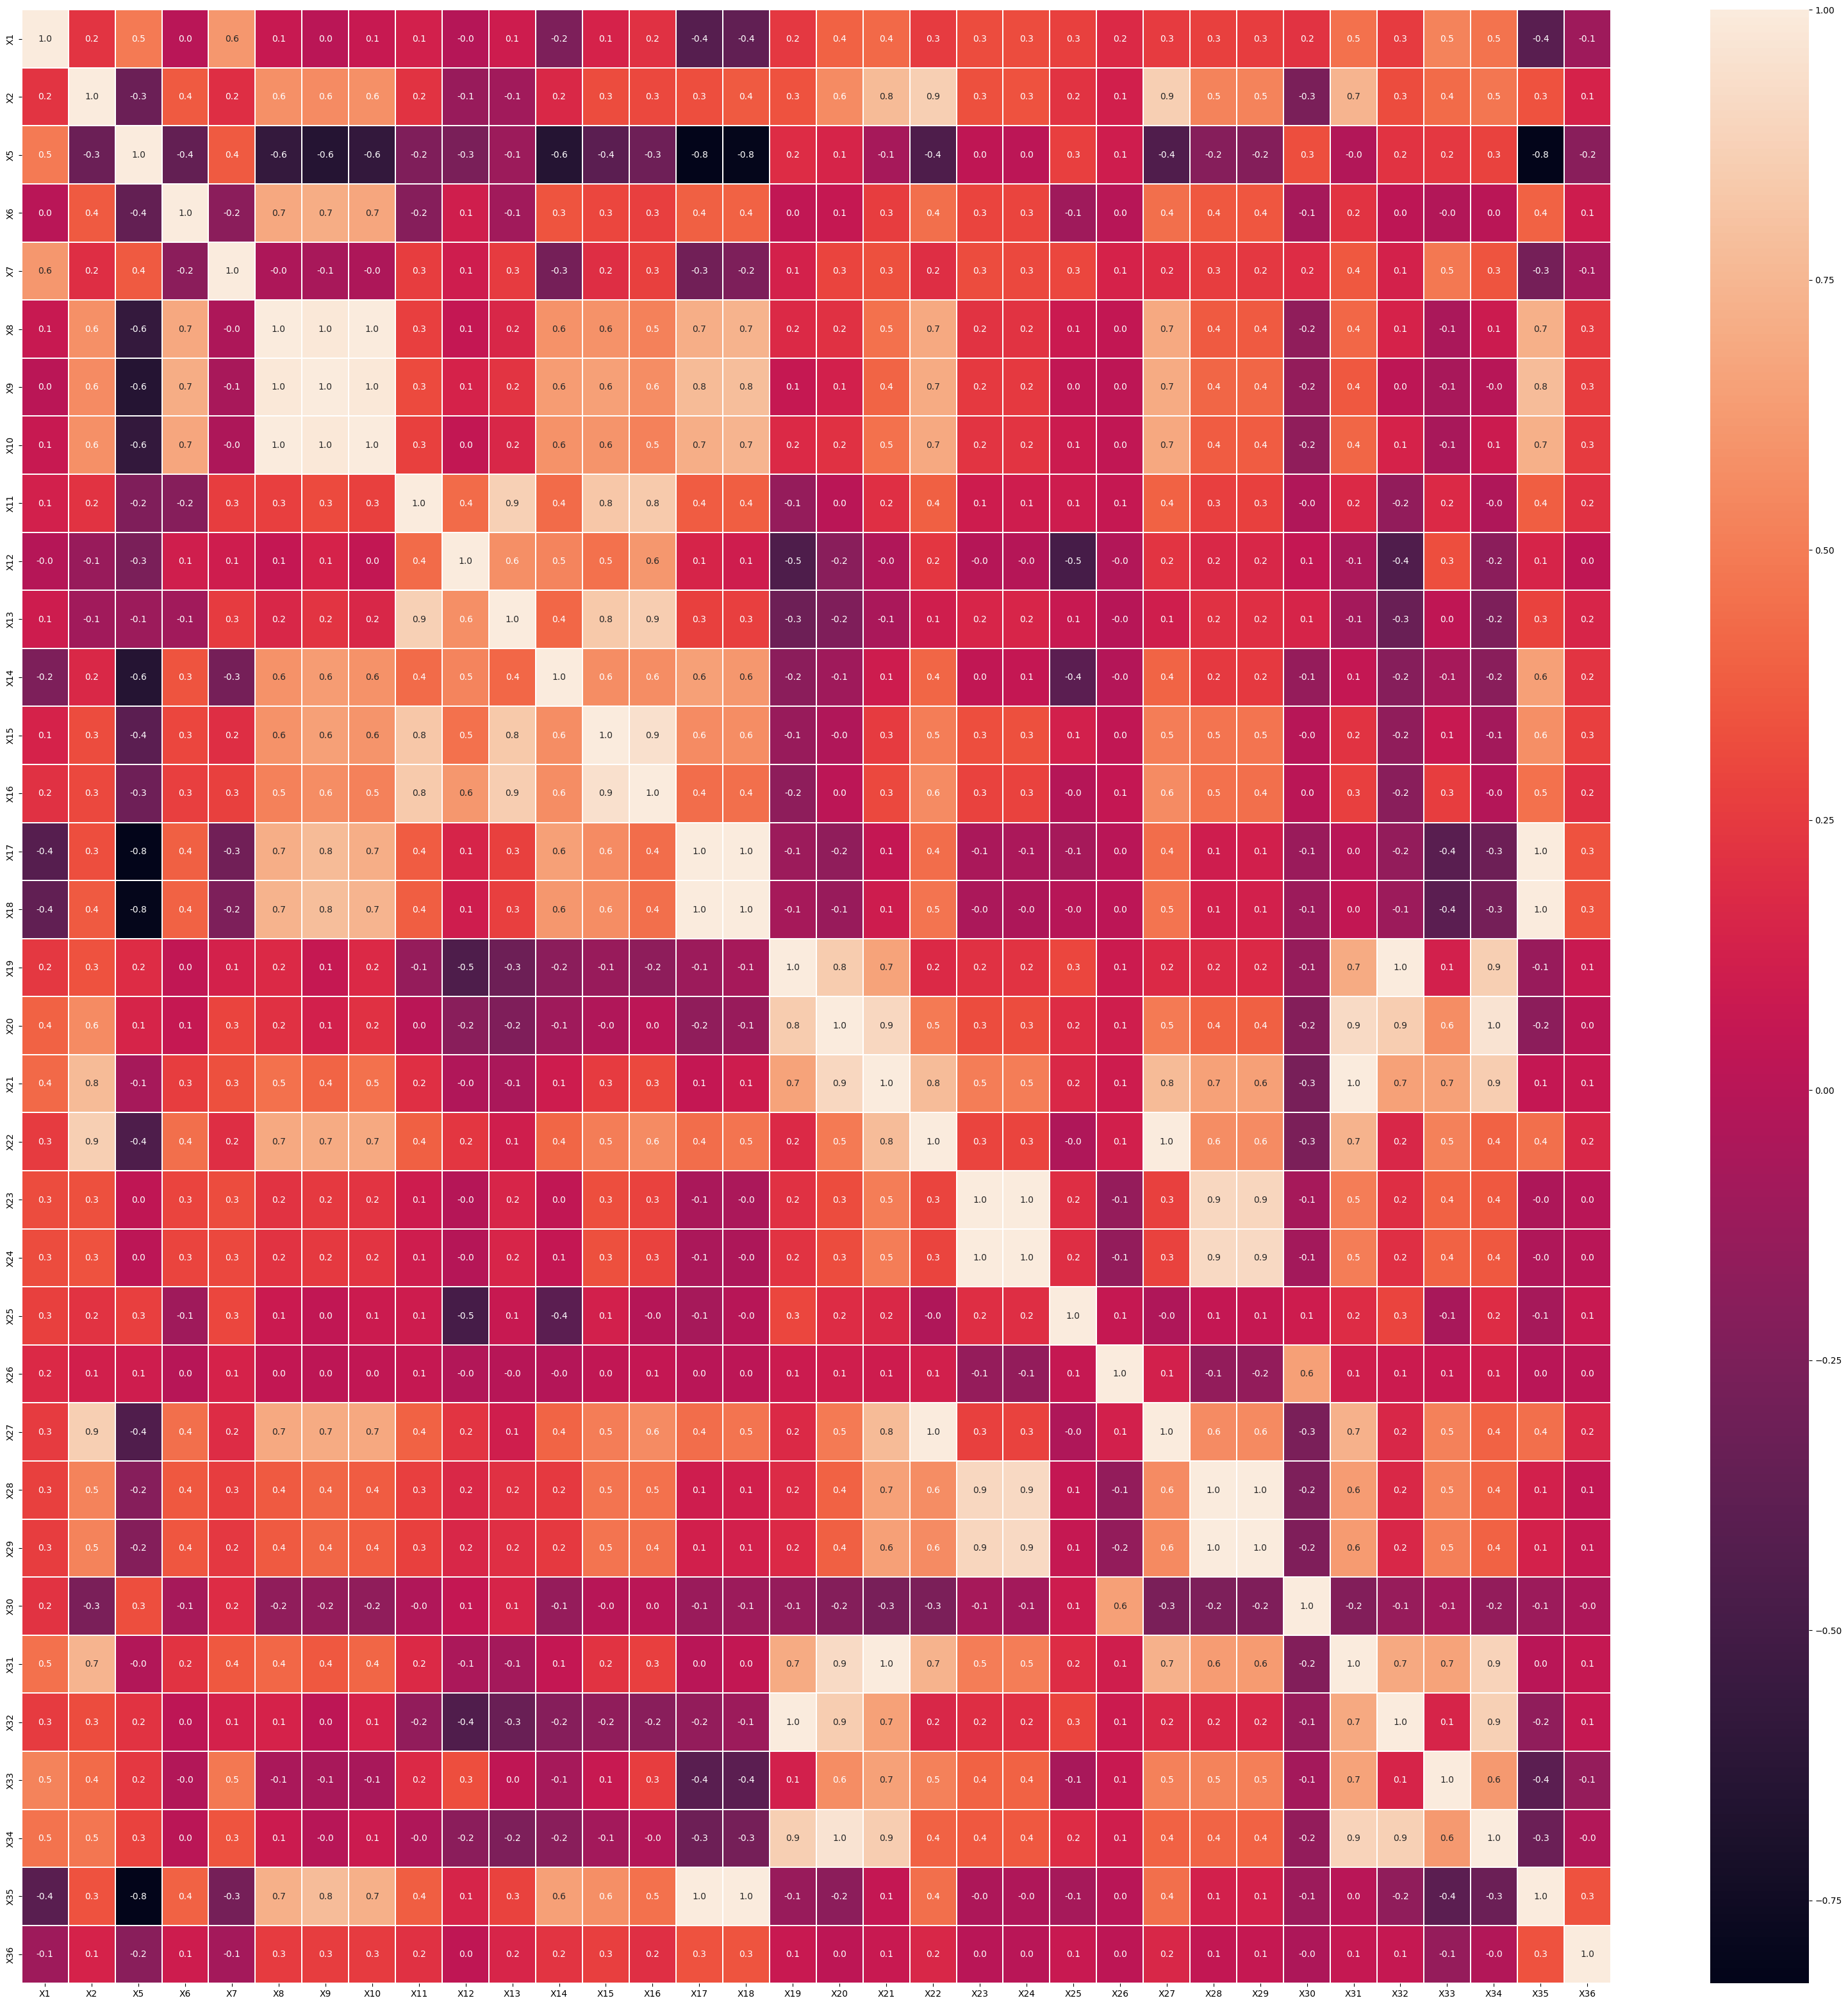

In [ ]:
fig, ax = plt.subplots(figsize=(40,40))
_ = sns.heatmap(df.loc[:, ~df.columns.isin(['Y'])].corr(),annot= True,linewidths=0.1,fmt = ".1f", ax=ax)

In [ ]:
corr_matrix = df.loc[:, ~df.columns.isin(['Y'])].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [ ]:
df_corr = df.copy()
df_corr.drop(to_drop, axis=1, inplace=True)

In [ ]:
df_corr.head()

,Y,X1,X2,X5,X6,X7,X8,X11,X12,X13,...,X20,X21,X22,X23,X25,X26,X28,X30,X33,X36
0,851.3,13992.829540,280.748261,390.014061,34.641964,0.590507,1.334964,254.064804,115.996136,289.254403,...,38.396885,46.083613,173.589934,1809.578281,0.0,1991.038192,1880.250775,1997.009659,4.122300,370.940167
1,851.7,13214.682745,287.760227,389.976684,29.417244,3.039666,1.261034,256.969473,117.097939,292.001201,...,39.030830,46.250694,173.485572,1826.127470,0.0,1997.014835,1900.988241,1990.852706,4.113665,371.119521
2,851.7,13214.682745,287.760227,389.976684,29.417244,3.039666,1.261034,256.969473,117.097939,292.001201,...,39.030830,46.250694,173.485572,1826.127470,0.0,1997.014835,1900.988241,1990.852706,4.113665,371.119521
3,852.4,13031.126273,287.446907,389.960257,23.281082,2.986076,1.269644,259.681162,116.990422,293.405546,...,39.051247,46.427059,173.513604,1821.998828,0.0,2012.590367,1894.297256,1981.679355,4.111253,371.213372
4,852.8,13599.110247,276.926470,389.995702,22.760785,3.119679,1.255986,259.255635,116.944134,293.103780,...,39.758041,47.260830,173.527839,1823.468686,0.0,2014.102222,1913.514736,1997.338611,4.134403,371.347260


## Визуализируем нашу целевую переменную

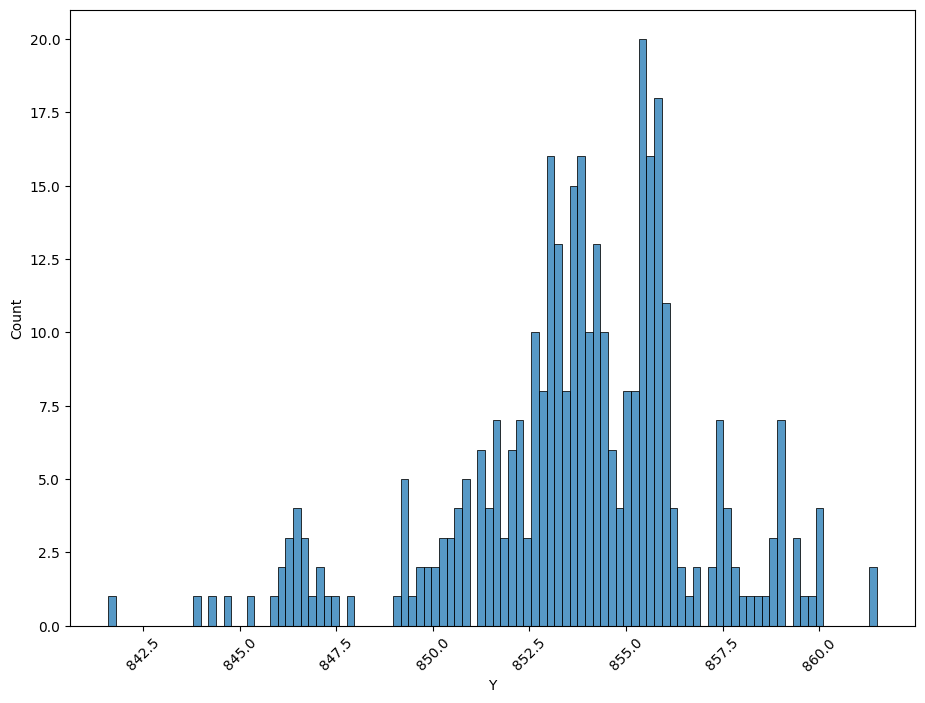

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.xticks(rotation=45)
sns.histplot(df["Y"], bins=100);

# Предобработка данных

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_corr.drop("Y", axis=1),
    df_corr["Y"],
    test_size=0.33,
    random_state=42
)

Нормализация численных признаков


In [15]:
from sklearn.preprocessing import StandardScaler

X_train_num = X_train[X_train.columns]
X_test_num = X_test[X_test.columns]

scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

# Линейная регрессия

##Инициализация модели

In [16]:
import numpy as np
np.random.seed(42)
from sklearn.linear_model import LinearRegression

Для оценки качества модели будем использовать $R^2$-метрику

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

## Подбор гиперпараметров





In [18]:
from sklearn.model_selection import GridSearchCV

def gridsearch(X_train, y_train, model, params, scoring="r2", cv=10):
  searcher = GridSearchCV(
      model,
      params,
      scoring=scoring,
      cv=cv
  )
  searcher.fit(X_train, y_train)
  best_params = searcher.best_params_
  return best_params

In [19]:
best_params_lr = gridsearch(
    X_train_num, y_train,
    LinearRegression(),
    {
        "fit_intercept": [True, False],
        "positive": [True, False],
    }
)

In [20]:
def model_train_test(X_train, y_train, X_test, y_test, model):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  r2 = r2_score(y_test, pred)
  print("R2 = {}".format(round(r2, 3)))

  return model, pred, r2

In [21]:
linreg, pred_lr, r2_lr = model_train_test(
    X_train_num,
    y_train,
    X_test_num,
    y_test,
    LinearRegression(**best_params_lr)
)

R2 = 0.097


## Модели с $L_1-$ и $L_2-$ регуляризацией


In [22]:
from sklearn.linear_model import Ridge, Lasso

In [23]:
best_params_ridge = gridsearch(
    X_train_num, y_train,
    Ridge(),
    {
        "alpha": np.logspace(-2, 3, 21),
        "tol": np.logspace(-5, 0, 21),
    }
)

ridge, pred_ridge, r2_ridge = model_train_test(
    X_train_num,
    y_train,
    X_test_num,
    y_test,
    Ridge(**best_params_ridge)
)

R2 = -0.163


In [24]:
best_params_lasso = gridsearch(
    X_train_num, y_train,
    Lasso(),
    {
        "alpha": np.logspace(-2, 3, 21),
        "tol": np.logspace(-5, 0, 21),

    }
)

lasso, pred_lasso, r2_lasso = model_train_test(
    X_train_num,
    y_train,
    X_test_num,
    y_test,
    Lasso(**best_params_lasso)
)

R2 = 0.248


## Результаты

In [25]:
ans_df = pd.DataFrame()
ans_df["Model"] = ["Linear Regression", "Ridge", "Lasso"]
ans_df["R2"] = [r2_lr, r2_ridge, r2_lasso]
ans_df.sort_values(by=["R2"], ascending=False)

,Model,R2
2,Lasso,0.247710
0,Linear Regression,0.097416
1,Ridge,-0.162769


Сохраняем модели

In [26]:
import pickle

In [27]:
#filenames = ['linreg.sav', 'ridge.sav', 'lasso.sav']
models = [linreg, ridge, lasso]
for model in models:
    pickle.dump(model, open('{}.sav'.format(model), 'wb'))